# Hands-On Deep Neural Networks - Part 1

In what follows we will describe the components of a deep neural network (DNN).<br>
The paper *"Deep Learning: An Introduction for Applied Mathematicians" (SIAM REVIEW, Vol.61, No. 4, 2019, p.860-891) by Catherine F. Higham and Desmond J. Higham* was our inspiration/guide. 


We will discuss the following topics:
* Motivation
* Activation function
* Neural network
* Cost function
* Optimization
* Back propagation

The **prerequisites** for this section are some knowledge of: 
* partial derivatives and the chain rule
* matrix multiplication
* Python and NumPy

Each section will have a small exercise.
The results of these exercises will be used to construct a deep neural net.
We will use this deep neural net code to perform the training of a neural network 
and do some inference.

In Part 2 , we will perform the same training and inference but we will rely on existing
software (PyTorch and Jax) 


### 1.Activation function

The **activation function** $f(x)$ is an operator which:
- transforms an **input** signal in a $\textcolor{red}{\textbf{non-linear}}$ way.
- and generates an **output** signal ($\textcolor{red}{\textbf{activation}}$).
  
It was modeled after a biological neuron. Thus, we can speak of an artificial neuron.

Several activation functions are used in neural nets, among them we find:
* sigmoid function:  $\displaystyle f(x):= \frac{1}{1+e^{-x}}$,&nbsp; for $x \in \mathbb{R}$
* tanh function   :  $\displaystyle f(x):= \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$,&nbsp; for $x \in \mathbb{R}$
* ReLU function   :  $\displaystyle f(x):= \texttt{max}(0,x)$,&nbsp; for $x \in \mathbb{R}$<br>
  - ReLU: Rectified Linear Unit
  - $\textcolor{red}{\textbf{non-differentiable}}$ at $x=0$
* GELU function   :  $\displaystyle f(x):= x \mathbb{P}(Z<x)$,&nbsp; for $x \in \mathbb{R}$ where $Z \sim N(0,1)$<br>
  - GELU: Gaussian Error Linear Unit
  - $\displaystyle f(x):= x \mathbb{P}(Z<x) = x\Phi(x) = x \int_{-\infty}^x \frac{e^{-t^2/2}}{\sqrt{2\pi}}dt$

#### 1.1. Example: sigmoid function

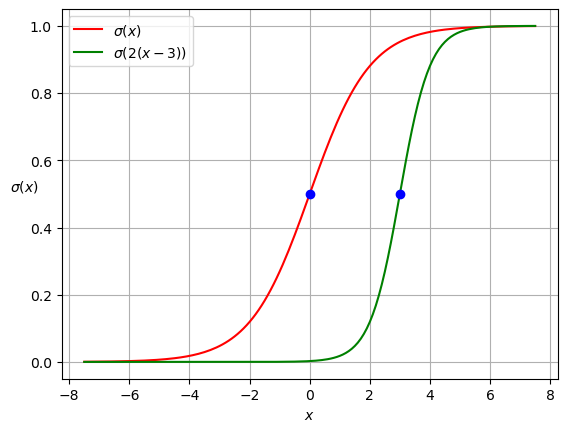

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-7.5,7.5,151)
y = 1.0/(1.0 + np.exp(-x))
w, b = 2.0, -6.0
z = 1.0/(1.0 + np.exp(-(w*x+b)))

plt.plot(x,y,label=r"$\sigma(x)$", color="red")
plt.plot(x,z,label=r"$\sigma(2 (x-3))$", color="green")
plt.plot(0.0,0.5,'bo')
plt.plot(3.0,0.5,'bo')
plt.xlabel(r"$x$")
plt.ylabel(r"$\sigma(x)$",rotation=0)
plt.legend()
plt.grid()

Some well-known properties of the **sigmoid function** ($\sigma(x)$):
* $\displaystyle \lim_{x\to -\infty} \sigma(x) = 0 $
* $\displaystyle \lim_{x\to +\infty} \sigma(x) = 1 $
* $\displaystyle \sigma(x=0) = \frac{1}{2} $
* $\displaystyle \frac{d \sigma(x)}{dx} = \sigma(x)(1-\sigma(x))$

**Note:**
* In neural nets, the activation function takes the argument $w.x+b$ instead of $x$,<br>
  where:
  - $w$ : **weight**, i.e. **scaling**
  - $b$ : **bias**, i.e. **shift**
* Until now, we only considered only scalar activation functions:<br>
  $\displaystyle f(w.x+b)$: $\mathbb{R} \rightarrow \mathbb{R}$
* In praxi, vector-valued versions are used:<br>
  $\displaystyle f(\mathbf{W}.\mathbf{x}+\mathbf{b})$: $\mathbb{R}^m \rightarrow \mathbb{R}^n$<br>
  where:
  - $\mathbf{x} \in \mathbb{R}^m$
  - $\mathbf{b} \in \mathbb{R}^n$
  - $\mathbf{W} \in \mathbb{R}^{n \times m}$
* Let $\mathbf{z} = \displaystyle f(\mathbf{W}.\mathbf{x}+\mathbf{b})$ then:<br>
  $z_i = \displaystyle f\Big(\sum_{j=1}^m W_{ij}.x_{j}+ b_i \Big)$, and $i \in \{1,\ldots,n\}$

### 2.Neural nets